In [1]:
%%capture
!pip install pyspark
!pip install findspark
# !pip install tensorflow
#https://github.com/thushv89/packt_nlp_tensorflow_2/blob/master/Ch02-Understanding-TensorFlow/tensorflow_introduction.ipynb

In [2]:
import tensorflow as tf 
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [3]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [4]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

#Variables
Normal tf.Tensor objects are immutable. To store model weights (or other mutable state) in TensorFlow use a tf.Variable.

In [6]:
var = tf.Variable([0.0, 0.0, 0.0])
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

#Automatic differentiation
Gradient descent and related algorithms are a cornerstone of modern machine learning.

To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's error or loss with respect to its weights.

In [7]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y
f(x)  

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

#Graphs and tf.function
While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

Performance optimization: to speed up training and inference.
Export: so you can save your model when it's done training.
These require that you use tf.function to separate your pure-TensorFlow code from Python.

In [8]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)


In [9]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. Below, note that my_func doesn't print tracing since print is a Python function, not a TensorFlow function.

In [10]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [11]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [12]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [13]:
import tensorflow as tf
import tensorflow.keras.backend as K
# Making sure we have the correct TF version
print(f"TensorFlow version => {tf.__version__}")
# import tensorflow.keras.backend as K
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
# Making sure we have the correct TF version
# print(f"TensorFlow version => {tf.__version__}")

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except Exception as ex:        
        print("Couldn't set memory_growth")
        pass
    
import numpy as np
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

import findspark
findspark.init()

# For running Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark").getOrCreate()
# For running Pandas on top of Spark
import pyspark.pandas as ps

TensorFlow version => 2.9.2


Put simply, a Python decorator is just another function. A Python decorator provides a clean way to call another function whenever you call the decorated function. In other words, every time the layer() function is called, tf.function() is called. This can be used for various purposes, such as:

Logging the content and operations in a function
Validating the inputs and outputs of another function

When the layer() function is passing through tf.function(), TensorFlow will trace the content (in other words, the operations and data) in the function and build a computational graph automatically.

The computational graph (also known as the dataflow graph) builds a DAG (a directed acyclic graph) that shows what kind of inputs are required, and what sort of computations need to be done in the program.

In our example, the layer() function produces h by using inputs x, W, and b, and some transformations or operations such as + and tf.matmul()

In [14]:
#add a Python decorator called tf.function as follows
@tf.function
def layer(x, W, b):    
    # Building the graph
    h = tf.nn.sigmoid(tf.matmul(x,W) + b) # Operation to perform
    return h
x = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]], dtype=np.float32) 
# Variable
init_w = tf.initializers.RandomUniform(minval=-0.1, maxval=0.1)(shape=[10,5])
W = tf.Variable(init_w, dtype=tf.float32, name='W') 
# Variable
init_b = tf.initializers.RandomUniform()(shape=[5])
b = tf.Variable(init_b, dtype=tf.float32, name='b') 
h = layer(x, W, b)
print(f"h = {h.numpy()}")

h = [[0.5000421  0.48340923 0.5532379  0.49177986 0.5213037 ]]


In [15]:
x = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]], dtype=np.float32)


In [16]:
# The filename queue
filenames = [f"./iris.data.{i}" for i in range(1,4)]

# Defining a dataset object that accepts CSV type data
dataset = tf.data.experimental.CsvDataset(
    filenames, [tf.float32, tf.float32, tf.float32, tf.float32, tf.string])

# First 4 columns in the CSV file are input features where the last is class label
# tf.stack() combines the individual features to a single tensor
dataset = dataset.map(lambda x1,x2,x3,x4,y: (tf.stack([x1,x2,x3,x4]), y))

# Iterating through the dataset
for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy().decode('ascii')
    if np.min(x)<0.0:
        print(f"(corrupted) X => {x}\tY => {y}")

(corrupted) X => [ 5.8 -4.   1.2  0.2]	Y => Iris-setosa
(corrupted) X => [ 4.6  3.6 -1.   0.2]	Y => Iris-setosa
(corrupted) X => [ 4.7 -3.2  1.6  0.2]	Y => Iris-setosa
(corrupted) X => [-5.   3.5  1.3  0.3]	Y => Iris-setosa
(corrupted) X => [-5.1  3.8  1.6  0.2]	Y => Iris-setosa
(corrupted) X => [ 6.9 -3.1  4.9  1.5]	Y => Iris-versicolor
(corrupted) X => [-5.2  2.7  3.9  1.4]	Y => Iris-versicolor
(corrupted) X => [ 5.8  2.7  4.1 -1. ]	Y => Iris-versicolor
(corrupted) X => [ 6.1 -2.8  4.7  1.2]	Y => Iris-versicolor
(corrupted) X => [ 5.4  3.  -4.5  1.5]	Y => Iris-versicolor
(corrupted) X => [ 7.1 -3.   5.9  2.1]	Y => Iris-virginica
(corrupted) X => [ 5.7  2.5  5.  -2. ]	Y => Iris-virginica
(corrupted) X => [-6.   2.2  5.   1.5]	Y => Iris-virginica
(corrupted) X => [ 7.2 -3.2  6.   1.8]	Y => Iris-virginica
(corrupted) X => [ 6.1  2.6  5.6 -1.4]	Y => Iris-virginica


#SKIP-GRAM

In [17]:
%%capture
!pip install adjustText

In [18]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
%matplotlib inline
import zipfile
import re
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
from adjustText import adjust_text

In [19]:
url = 'http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip'


def download_data(url, data_dir):
    """Download a file if not present, and make sure it's the right size."""
    
    os.makedirs(data_dir, exist_ok=True)

    file_path = os.path.join(data_dir, 'bbc-fulltext.zip')
  
    if not os.path.exists(file_path):
        print('Downloading file...')
        filename, _ = urlretrieve(url, file_path)
    else:
        print("File already exists")
  
    extract_path = os.path.join(data_dir, 'bbc')
    if not os.path.exists(extract_path):
        
        with zipfile.ZipFile(os.path.join(data_dir, 'bbc-fulltext.zip'), 'r') as zipf:
            zipf.extractall(data_dir)
  
    else:
        print("bbc-fulltext.zip has already been extracted")
    
download_data(url, 'data')

#Read Data without Preprocessing
Reads data as it is to a string and tokenize it using spaces and returns a list of words

In [20]:
def read_data(data_dir):
    
    # This will contain the full list of stories
    news_stories = []
    
    print("Reading files")
    
    i = 0 # Just used for printing progress
    for root, dirs, files in os.walk(data_dir):
        
        for fi, f in enumerate(files):
            
            # We don't read the readme file
            if 'README' in f:
                continue
            
            # Printing progress
            i += 1
            print("."*i, f, end='\r')
            
            # Open the file
            with open(os.path.join(root, f), encoding='latin-1') as f:
                
                story = []
                # Read all the lines
                for row in f:
                                        
                    story.append(row.strip())
                    
                # Create a single string with all the rows in the doc
                story = ' '.join(story)                        
                # Add that to the list
                news_stories.append(story)  
                
        print('', end='\r')
        
    print(f"\nDetected {len(news_stories)} stories")
    return news_stories
                
  
news_stories = read_data(os.path.join('data', 'bbc'))

# Printing some stats and sample data
print(f"{sum([len(story.split(' ')) for story in news_stories])} words found in the total news set")
print('Example words (start): ',news_stories[0][:50])
print('Example words (end): ',news_stories[-1][-50:])

Reading files
..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

#Build a Tokenizer

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' '
)

tokenizer.fit_on_texts(news_stories)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


#EXPLORING THE TOKENIZER

In [22]:
n_vocab = len(tokenizer.word_index.items()) + 1
print(f"Vocabulary size: {n_vocab}")

print("\nWords at the top")
print('\t', dict(list(tokenizer.word_index.items())[:10]))
print("\nWords at the bottom")
print('\t', dict(list(tokenizer.word_index.items())[-10:]))

Vocabulary size: 32360

Words at the top
	 {'the': 1, 'to': 2, 'of': 3, 'and': 4, 'a': 5, 'in': 6, 'for': 7, 'is': 8, 'that': 9, 'on': 10}

Words at the bottom
	 {'malls': 32350, 'lynn': 32351, 'dwarfed': 32352, '204m': 32353, '187m': 32354, 'outperformance': 32355, 'onshore': 32356, "energy's": 32357, 'congo': 32358, 'finian': 32359}


#Build a Tokenizer (Refined)
Here, we will restrict the vocabulary to 15000 and eleminate words except the first most common 15000 words

As the Tokenizer’s vocabulary does not encompass all possible words in the true vocabulary, out-of-vocabulary words (or OOV words) can rear their heads. Some solutions are to replace OOV words with a special token (such as <UNK>) or remove them from the corpus. This is possible by passing the string you want to replace OOV tokens with to the oov_token argument in the Tokenizer. In this case, we will remove OOV words. If we are careful when setting the size of the vocabulary, omitting some of the rare words would not harm learning the context of words accurately.



In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

n_vocab = 15000 + 1
tokenizer = Tokenizer(
    num_words=n_vocab-1,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', oov_token='',    
)

tokenizer.fit_on_texts(news_stories)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


#Checking the results of the tokenizer

In [24]:
print(f"Original: {news_stories[0][:100]}")
print(f"Sequence IDs: {tokenizer.texts_to_sequences([news_stories[0][:100]])[0]}")

Original: Loyalty cards idea for TV addicts  Viewers could soon be rewarded for watching TV as loyalty cards c
Sequence IDs: [5574, 760, 748, 8, 178, 1, 1333, 60, 862, 15, 5575, 8, 1814, 178, 18, 5574, 760, 2051]


#Converting all articles to word ID sequences


In [25]:
news_sequences = tokenizer.texts_to_sequences(news_stories)

#Generating skip-grams from the corpus
In TensorFlow you have the convenient tf.keras.preprocessing.sequence.skipgrams() function to generate skipgrams.

In [26]:
sample_word_ids = news_sequences[0][:5]
sample_phrase = ' '.join([tokenizer.index_word[wid] for wid in sample_word_ids])
print(f"Sample phrase: {sample_phrase}")
print(f"Sample word IDs: {sample_word_ids}\n")

window_size = 1 # How many words to consider left and right.

inputs, labels = tf.keras.preprocessing.sequence.skipgrams(
    sample_word_ids, 
    vocabulary_size=n_vocab, 
    window_size=window_size, negative_samples=1.0, shuffle=False,
    categorical=False, sampling_table=None, seed=None
)


print("Sample skip-grams")

for inp, lbl in zip(inputs, labels):
    print(f"\tInput: {inp} ({[tokenizer.index_word[wi] for wi in inp]}) / Label: {lbl}")


Sample phrase: loyalty cards idea for tv
Sample word IDs: [5574, 760, 748, 8, 178]

Sample skip-grams
	Input: [5574, 760] (['loyalty', 'cards']) / Label: 1
	Input: [760, 5574] (['cards', 'loyalty']) / Label: 1
	Input: [760, 748] (['cards', 'idea']) / Label: 1
	Input: [748, 760] (['idea', 'cards']) / Label: 1
	Input: [748, 8] (['idea', 'for']) / Label: 1
	Input: [8, 748] (['for', 'idea']) / Label: 1
	Input: [8, 178] (['for', 'tv']) / Label: 1
	Input: [178, 8] (['tv', 'for']) / Label: 1
	Input: [760, 523] (['cards', 'young']) / Label: 0
	Input: [8, 12842] (['for', 'embezzlement']) / Label: 0
	Input: [8, 8131] (['for', "summer's"]) / Label: 0
	Input: [178, 10825] (['tv', 'gonna']) / Label: 0
	Input: [748, 825] (['idea', 'comedy']) / Label: 0
	Input: [760, 1306] (['cards', 'effect']) / Label: 0
	Input: [748, 1716] (['idea', 'word']) / Label: 0
	Input: [5574, 12264] (['loyalty', 'uncover']) / Label: 0


#Generating negative candidates
Word2vec algorithms rely on negative candidates to understand words that do not appear in the context of a given target word.



In [27]:
inputs, labels = tf.keras.preprocessing.sequence.skipgrams(
    sample_word_ids, 
    vocabulary_size=len(tokenizer.word_index.items())+1, 
    window_size=window_size, negative_samples=0, shuffle=False,    
)

inputs, labels = np.array(inputs), np.array(labels)

negative_sampling_candidates, true_expected_count, sampled_expected_count = tf.random.log_uniform_candidate_sampler(
    # A true context word that appears in the context of the target
    true_classes=inputs[:1,1:], # [b, 1] sized tensor
    num_true=1, # number of true words per example
    num_sampled=10,
    unique=True,
    range_max=n_vocab,            
    name="negative_sampling"
)

print(f"Positive sample: {inputs[:1,1:]}")
print(f"Negative samples: {negative_sampling_candidates}")
print(f"true_expected_count: {true_expected_count}")
print(f"sampled_expected_count: {sampled_expected_count}")

Positive sample: [[760]]
Negative samples: [5340   23 1399 6662 4090   37 8703    7   25   12]
true_expected_count: [[0.00136565]]
sampled_expected_count: [1.94690641e-04 4.24524248e-02 7.42549193e-04 1.56065144e-04
 2.54170853e-04 2.70129479e-02 1.19471544e-04 1.22487292e-01
 3.92476805e-02 7.70678520e-02]


In [28]:
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(n_vocab, sampling_factor=1e-05)

print(sampling_table)

[0.00315225 0.00315225 0.00547597 ... 1.         1.         1.        ]


When selecting negative candidates, the skipgrams() function selects them randomly, giving uniform weights to all the words in the vocabulary. However, the original paper explains that this can lead to poor performance. A better strategy is to use the unigram distribution as a prior for selecting negative context words.



#Zipf's law
Zipf's law states that the frequency of a token in a text is directly proportional to its rank or position in the sorted list. This law describes how tokens are distributed in languages: some tokens occur very frequently, some occur with intermediate frequency, and some tokens rarely occur.

Here, math is a hyperparameter that can be tuned to match the true distribution more closely. This is known as Zipf’s law. In other words, if you have a vocabulary where words are ranked (ID-ed) from most common to least common, you can approximate the normalized frequency of each word using Zipf’s law. We will be sampling words according to the probabilities output through Zipf’s law instead of giving equal probabilities to the words. This means words are sampled according to their presence (that is, the more frequent, the higher the chance of being sampled) in the corpus.

#Generating data (positive + negative candidates)

In [29]:
def skip_gram_data_generator(sequences, window_size, batch_size, negative_samples, vocab_size, seed=None):
    
    rand_sequence_ids = np.arange(len(sequences))                    
    np.random.shuffle(rand_sequence_ids)


    for si in rand_sequence_ids:
        
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
            sequences[si], 
            vocabulary_size=vocab_size, 
            window_size=window_size, 
            negative_samples=0.0, 
            shuffle=False,
            sampling_table=sampling_table,
            seed=seed
        )
        
        targets, contexts, labels = [], [], []
        
        for target_word, context_word in positive_skip_grams:
            context_class = tf.expand_dims(tf.constant([context_word], dtype="int64"), 1)
            
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
              true_classes=context_class,
              num_true=1,
              num_sampled=negative_samples,
              unique=True,
              range_max=vocab_size,              
              name="negative_sampling")

            # Build context and label vectors (for one target word)
            context = tf.concat(
                [tf.constant([context_word], dtype='int64'), negative_sampling_candidates],
                axis=0
            )
            
            label = tf.constant([1] + [0]*negative_samples, dtype="int64")

            # Append each element from the training example to global lists.
            targets.extend([target_word]*(negative_samples+1))
            contexts.append(context)
            labels.append(label)

        contexts, targets, labels = np.concatenate(contexts), np.array(targets), np.concatenate(labels)
        
        assert contexts.shape[0] == targets.shape[0]
        assert contexts.shape[0] == labels.shape[0]
        
        # If seed is not provided generate a random one
        if not seed:
            seed = random.randint(0, 10e6)
            
        np.random.seed(seed)
        np.random.shuffle(contexts)
        np.random.seed(seed)
        np.random.shuffle(targets)
        np.random.seed(seed)
        np.random.shuffle(labels)
        
    
        for eg_id_start in range(0, contexts.shape[0], batch_size):            
            yield (
                targets[eg_id_start: min(eg_id_start+batch_size, targets.shape[0])], 
                contexts[eg_id_start: min(eg_id_start+batch_size, contexts.shape[0])]
            ), labels[eg_id_start: min(eg_id_start+batch_size, labels.shape[0])]


news_skip_gram_gen = skip_gram_data_generator(
    news_sequences, 4, 10, 5, n_vocab
)

for btc, bl in news_skip_gram_gen:
    
    print(btc)
    print(bl)
    
    break


(array([ 4775,   595,  1322,  1429,  7928, 10798,  4775,  2709,   417,
         552]), array([   4,  120,    1,   14,    1,  595,   59,   45, 8883,    2]))
[0 0 0 1 0 1 0 0 0 0]


#Implementing the skip-gram architecture with TensorFlow
Defining Hyperparameters
Here we define several hyperparameters including batch_size (amount of samples in a single batch) embedding_size (size of embedding vectors) window_size (context window size).

In [30]:
batch_size = 4096 # Data points in a single batch

embedding_size = 128 # Dimension of the embedding vector.

window_size=1 # We use a window size of n on either side of target word
negative_samples = 4 # Number of negative samples generated per example

epochs = 5 # Number of epochs to train for

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.
# We sample valid datapoints randomly from a large window without always being deterministic
valid_window = 250

# When selecting valid examples, we select some of the most frequent words as well as
# some moderately rare words as well
np.random.seed(54321)
random.seed(54321)

valid_term_ids = np.array(random.sample(range(valid_window), valid_size))
valid_term_ids = np.append(
    valid_term_ids, random.sample(range(1000, 1000+valid_window), valid_size),
    axis=0
)


In [31]:
import tensorflow.keras.backend as K

K.clear_session()

# Inputs - skipgrams() function outputs target, context in that order
# we will use the same order
input_1 = tf.keras.layers.Input(shape=(), name='target')
input_2 = tf.keras.layers.Input(shape=(), name='context')

# Two embeddings layers are used one for the context and one for the target
context_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='context_embedding'
)
target_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='target_embedding'
)

# Lookup outputs of the embedding layers
target_out = target_embedding_layer(input_1)
context_out = context_embedding_layer(input_2)

# Computing the dot product between the two 
out = tf.keras.layers.Dot(axes=-1)([context_out, target_out])

# Defining the model
skip_gram_model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=out, name='skip_gram_model')

# Compiling the model
skip_gram_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam'
)

skip_gram_model.summary()


Model: "skip_gram_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 context (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 target (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 context_embedding (Embedding)  (None, 128)          1920128     ['context[0][0]']                
                                                                                                  
 target_embedding (Embedding)   (None, 128)          1920128     ['target[0][0]']                 
                                                                                    

In [32]:
class ValidationCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_term_ids, model_with_embeddings, tokenizer):
        
        self.valid_term_ids = valid_term_ids
        self.model_with_embeddings = model_with_embeddings
        self.tokenizer = tokenizer
        
        super().__init__()
        
    def on_epoch_end(self, epoch, logs=None):
        """ Validation logic """
                
        # We will use context embeddings to get the most similar words
        # Other strategies include: using target embeddings, mean embeddings after avaraging context/target
        embedding_weights = self.model_with_embeddings.get_layer("context_embedding").get_weights()[0]
        normalized_embeddings = embedding_weights / np.sqrt(np.sum(embedding_weights**2, axis=1, keepdims=True))
        
        # Get the embeddings corresponding to valid_term_ids
        valid_embeddings = normalized_embeddings[self.valid_term_ids, :]
        
        # Compute the similarity between valid_term_ids and all the embeddings
        # V x d (d x D) => V x D
        top_k = 5 # Top k items will be displayed
        similarity = np.dot(valid_embeddings, normalized_embeddings.T)
        
        # Invert similarity matrix to negative
        # Ignore the first one because that would be the same word as the probe word
        similarity_top_k = np.argsort(-similarity, axis=1)[:, 1: top_k+1]
                
        # Print the output
        for i, term_id in enumerate(valid_term_ids):
            
            similar_word_str = ', '.join([self.tokenizer.index_word[j] for j in similarity_top_k[i, :] if j >= 1])
            print(f"{self.tokenizer.index_word[term_id]}: {similar_word_str}")
        
        print('\n')

In [33]:
# skipgram_validation_callback = ValidationCallback(valid_term_ids, skip_gram_model, tokenizer)

# for ei in range(epochs):
    
#     print(f"Epoch: {ei+1}/{epochs} started")
    
#     news_skip_gram_gen = skip_gram_data_generator(
#         news_sequences, window_size, batch_size, negative_samples, n_vocab
#     )
    
#     skip_gram_model.fit(
#         news_skip_gram_gen, epochs=1, 
#         callbacks=skipgram_validation_callback,        
#     )

In [34]:
def save_embeddings(model, tokenizer, vocab_size, save_dir):
    
    os.makedirs(save_dir, exist_ok=True)
    
    _, words_sorted = zip(*sorted(list(tokenizer.index_word.items()), key=lambda x: x[0])[:vocab_size-1])
        
    words_sorted = [None] + list(words_sorted)
    
    pd.DataFrame(
        model.get_layer("context_embedding").get_weights()[0], 
        index = words_sorted
    ).to_pickle(os.path.join(save_dir, "context_embedding.pkl"))
    
    pd.DataFrame(
        model.get_layer("target_embedding").get_weights()[0], 
        index = words_sorted
    ).to_pickle(os.path.join(save_dir, "target_embedding.pkl"))

    
save_embeddings(skip_gram_model, tokenizer, n_vocab, save_dir='skipgram_embeddings')

# CBOW Algorithm

In [98]:
def cbow_grams(sequence, vocabulary_size,
              window_size=4, negative_samples=1., shuffle=True,
              categorical=False, sampling_table=None, seed=None):
    
    targets, contexts, labels = [], [], []    
        
    for i, wi in enumerate(sequence):
        
        
        if not wi or i < window_size or i + 1 > len(sequence)-window_size:
            continue
        if sampling_table is not None:
            if sampling_table[wi] < random.random():
                continue

        window_start = max(0, i - window_size)
        window_end = min(len(sequence), i + window_size + 1)
        
        context_words = [wj for j, wj in enumerate(sequence[window_start:window_end]) if j+window_start != i]
        target_word = wi        
            
        context_classes = tf.expand_dims(tf.constant(context_words, dtype="int64"), 0)

        negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
          true_classes=context_classes,
          num_true=window_size * 2,
          num_sampled=negative_samples,
          unique=True,
          range_max=vocabulary_size,              
          name="negative_sampling")

        # Build context and label vectors (for one target word)        
        negative_targets = negative_sampling_candidates.numpy().tolist()        

        target = [target_word] + negative_targets
        label = [1] + [0]*negative_samples

        # Append each element from the training example to global lists.
        targets.extend(target)
        contexts.extend([context_words]*(negative_samples+1))
        labels.extend(label)
        
    couples = list(zip(targets, contexts))
    
    seed = random.randint(0, 10e6)
    random.seed(seed)
    random.shuffle(couples)    
    random.seed(seed)
    random.shuffle(labels)
           
    
    return couples, labels


window_size = 1 # How many words to consider left and right.


inputs, labels = cbow_grams(
    tokenizer.texts_to_sequences(["I am going to the store"])[0], 
    vocabulary_size=len(tokenizer.word_index.items())+1, 
    window_size=window_size, negative_samples=4, shuffle=False,
    categorical=False, sampling_table=None, seed=None
)

print(tokenizer.texts_to_sequences(["I am going to the store"]))
i = 0
for inp, lbl in zip(inputs, labels):
    i += 1
    print(f"Input: {inp} ({[[tokenizer.index_word[wi] for wi in inp[1] ]] + [tokenizer.index_word[inp[0]] if inp[0] > 0 else None]})/ Label: {lbl}")
    # 
    if i >= 20:
        break

[[28, 428, 132, 3, 2, 1494]]
Input: (428, [28, 132]) ([['i', 'going'], 'am'])/ Label: 1
Input: (32, [428, 3]) ([['am', 'to'], 'this'])/ Label: 0
Input: (22341, [428, 3]) ([['am', 'to'], 'lingerie'])/ Label: 0
Input: (14372, [28, 132]) ([['i', 'going'], 'encounters'])/ Label: 0
Input: (1747, [132, 2]) ([['going', 'the'], 'managed'])/ Label: 0
Input: (13913, [132, 2]) ([['going', 'the'], 'mennear'])/ Label: 0
Input: (34, [28, 132]) ([['i', 'going'], 'we'])/ Label: 0
Input: (314, [28, 132]) ([['i', 'going'], 'away'])/ Label: 0
Input: (3, [132, 2]) ([['going', 'the'], 'to'])/ Label: 1
Input: (1721, [3, 1494]) ([['to', 'store'], 'worst'])/ Label: 0
Input: (7981, [3, 1494]) ([['to', 'store'], 'jacket'])/ Label: 0
Input: (132, [428, 3]) ([['am', 'to'], 'going'])/ Label: 1
Input: (0, [28, 132]) ([['i', 'going'], None])/ Label: 0
Input: (1, [428, 3]) ([['am', 'to'], ''])/ Label: 0
Input: (81, [428, 3]) ([['am', 'to'], 'against'])/ Label: 0
Input: (1013, [132, 2]) ([['going', 'the'], 'build'])/ 

In [99]:
window_size = 1 # How many words to consider left and right.

inputs, labels = tf.keras.preprocessing.sequence.skipgrams(
    tokenizer.texts_to_sequences([news_stories[0][:150]])[0], 
    vocabulary_size=len(tokenizer.word_index.items())+1, 
    window_size=window_size, negative_samples=4, shuffle=False,
    categorical=False, sampling_table=None, seed=None
)

i = 0
for inp, lbl in zip(inputs, labels):
    i += 1
    print(f"Input: {inp} ({[tokenizer.index_word[wi] for wi in inp]}) / Label: {lbl}")

Input: [5574, 760] (['loyalty', 'cards']) / Label: 1
Input: [760, 5574] (['cards', 'loyalty']) / Label: 1
Input: [760, 748] (['cards', 'idea']) / Label: 1
Input: [748, 760] (['idea', 'cards']) / Label: 1
Input: [748, 8] (['idea', 'for']) / Label: 1
Input: [8, 748] (['for', 'idea']) / Label: 1
Input: [8, 178] (['for', 'tv']) / Label: 1
Input: [178, 8] (['tv', 'for']) / Label: 1
Input: [178, 1] (['tv', '']) / Label: 1
Input: [1, 178] (['', 'tv']) / Label: 1
Input: [1, 1333] (['', 'viewers']) / Label: 1
Input: [1333, 1] (['viewers', '']) / Label: 1
Input: [1333, 60] (['viewers', 'could']) / Label: 1
Input: [60, 1333] (['could', 'viewers']) / Label: 1
Input: [60, 862] (['could', 'soon']) / Label: 1
Input: [862, 60] (['soon', 'could']) / Label: 1
Input: [862, 15] (['soon', 'be']) / Label: 1
Input: [15, 862] (['be', 'soon']) / Label: 1
Input: [15, 5575] (['be', 'rewarded']) / Label: 1
Input: [5575, 15] (['rewarded', 'be']) / Label: 1
Input: [5575, 8] (['rewarded', 'for']) / Label: 1
Input: [

In [100]:
batch_size = 4096 # Data points in a single batch

embedding_size = 128 # Dimension of the embedding vector.

window_size=1 # We use a window size of 1 on either side of target word
epochs = 5 # Number of epochs to train for
negative_samples = 4 # Number of negative samples generated per example

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.
# We sample valid datapoints randomly from a large window without always being deterministic
valid_window = 250

# When selecting valid examples, we select some of the most frequent words as well as
# some moderately rare words as well
np.random.seed(54321)
random.seed(54321)

valid_term_ids = np.array(random.sample(range(valid_window), valid_size))
valid_term_ids = np.append(
    valid_term_ids, random.sample(range(1000, 1000+valid_window), valid_size),
    axis=0
)

In [101]:
import tensorflow.keras.backend as K

K.clear_session()


# Inputs; target input layer will have the final shape [None]
# context will have [None, 2xwindow_size] shape
input_1 = tf.keras.layers.Input(shape=())
input_2 = tf.keras.layers.Input(shape=(window_size*2,))

# Target and context embedding layers
target_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='target_embedding'
)

context_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='context_embedding'
)

# Outputs of the target and context embedding lookups
context_out = context_embedding_layer(input_2)
target_out = target_embedding_layer(input_1)

# Taking the mean over the all the context words to produce [None, embedding_size]
mean_context_out = tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1))(context_out)

# Computing the dot product between the two 
out = tf.keras.layers.Dot(axes=-1)([context_out, target_out])

cbow_model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=out, name='cbow_model')

cbow_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam'
)

cbow_model.summary()

Model: "cbow_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 context_embedding (Embedding)  (None, 2, 128)       1920128     ['input_2[0][0]']                
                                                                                                  
 target_embedding (Embedding)   (None, 128)          1920128     ['input_1[0][0]']                
                                                                                         

In [103]:
def cbow_data_generator(sequences, window_size, batch_size, negative_samples):
    
    rand_sequence_ids = np.arange(len(sequences))                    
    np.random.shuffle(rand_sequence_ids)

    for si in rand_sequence_ids:
        inputs, labels = cbow_grams(
            sequences[si], 
            vocabulary_size=n_vocab, 
            window_size=window_size, 
            negative_samples=negative_samples, 
            shuffle=True,
            sampling_table=sampling_table,
            seed=None
        )
        
        inputs_context, inputs_target, labels = np.array([inp[1] for inp in inputs]), np.array([inp[0] for inp in inputs]), np.array(labels).reshape(-1,1)
        
        assert inputs_context.shape[0] == inputs_target.shape[0]
        assert inputs_context.shape[0] == labels.shape[0]
        
        #print(inputs_context.shape, inputs_target.shape, labels.shape)
        for eg_id_start in range(0, inputs_context.shape[0], batch_size):            
            
            yield (
                inputs_target[eg_id_start: min(eg_id_start+batch_size, inputs_target.shape[0])], 
                inputs_context[eg_id_start: min(eg_id_start+batch_size, inputs_context.shape[0]),:]
            ), labels[eg_id_start: min(eg_id_start+batch_size, labels.shape[0])]

In [104]:
cbow_validation_callback = ValidationCallback(valid_term_ids, cbow_model, tokenizer)

for ei in range(epochs):
    print(f"Epoch: {ei+1}/{epochs} started")
    news_cbow_gen = cbow_data_generator(news_sequences, window_size, batch_size, negative_samples)
    cbow_model.fit(
        news_cbow_gen, 
        epochs=1, 
        callbacks=cbow_validation_callback,         
    )

Epoch: 1/5 started
   2225/Unknown - 127s 57ms/step - loss: 0.4619election: attorney, researchers, index, severe, motors
months: job, headed, attorney, sunday's, jurgen
with: starring, bbc's, injury, travel, google
you: if, find, background, board, further
were: bbc's, greater, lse, whilst, ms
win: â£4, gas, travel, problem, heavy
those: edge, dr, heavily, white, debut
music: included, controls, leading, olivier, meanwhile
also: really, thousands, better, index, being
around: accounting, aviv, comes, trip, consecutive
best: joe, solid, mary, camp, non
him: controls, 9bn, greater, above, pay
too: heavily, copy, servers, poor, extremely
into: widely, controls, indoor, urged, indeed
through: included, board, authority, launch, totally
mr: what, who, matt, charles, downing
file: bbc's, child, country's, â£4, duo
5bn: scottish, gamers, leeds, park, philippe
east: scottish, launch, attacking, training, century
critics: accounting, that's, powerful, expression, corporate
post: clark, heart, b

In [105]:
save_embeddings(cbow_model, tokenizer, n_vocab, save_dir='cbow_embeddings')


#Visulizing the Learnings of the Skip-Gram Algorithm
Loading skip-gram embeddings


In [106]:
skipgram_context_embeddings = pd.read_pickle(
    os.path.join('skipgram_embeddings', 'context_embedding.pkl')
)

skipgram_words, skipgram_embeddings = np.array(skipgram_context_embeddings.index), skipgram_context_embeddings.values


#Finding Only the Words Clustered Together Instead of Sparsely Distributed Words


In [107]:
def find_clustered_embeddings(embeddings, top_n=10, top_words=2000):
    ''' 
    Find only the closely clustered embeddings. 
    This gets rid of more sparsly distributed word embeddings and make the visualization clearer
    This is useful for t-SNE visualization
    
    distance_threshold: maximum distance between two points to qualify as neighbors
    sample_threshold: number of neighbors required to be considered a cluster
    '''
    
    # calculate cosine similarity
    embeddings_norm = embeddings / np.sum(embeddings**2, keepdims=True, axis=1)
    cosine_sim = np.dot(embeddings, embeddings.T)        
    
    sim_sum_words = np.sum(np.sort(cosine_sim, axis=1)[:,-top_n:], axis=1)
    
    clustered_words = np.argsort(-sim_sum_words)[:top_words]
    

    return clustered_words

#Computing the t-SNE Visualization of Word Embeddings Using Scikit-Learn

In [108]:
import sklearn


tsne = TSNE(
    perplexity=30, n_components=2, n_iter=5000, metric='cosine')

print('Fitting embeddings to T-SNE. This can take some time ...')
# get the T-SNE manifold

# prune the embeddings by getting ones only more than n-many sample above the similarity threshold
# this unclutters the visualization
plot_word_ids = find_clustered_embeddings(
    skipgram_embeddings, top_n=25, top_words=300
)


skipgram_embeddings_norm = skipgram_embeddings / np.sum(skipgram_embeddings**2, keepdims=True, axis=1)
tsne_embeddings = tsne.fit_transform(skipgram_embeddings_norm)

print('Pruning the T-SNE embeddings')

print('\tDone')

Fitting embeddings to T-SNE. This can take some time ...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Pruning the T-SNE embeddings
	Done


#Plotting the t-SNE Results with Matplotlib

Plotting 1500 points
Adjusting text annotations in the plot. This may take some time: Annotations 339


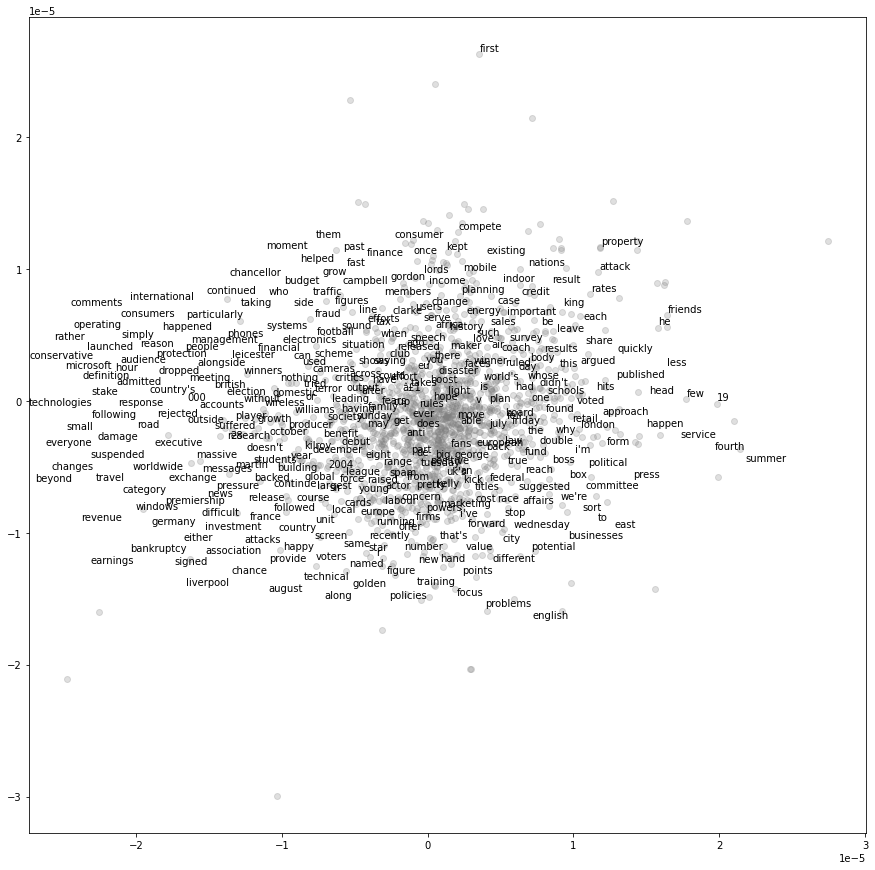

In [109]:
def plot(embeddings, labels):
    print(f"Plotting {embeddings.shape[0]} points")
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  
    plt.figure(figsize=(15,15))  # in inches
    
    # plot all the embeddings and their corresponding words
    plot_annotations = []
    
    for i, label in enumerate(labels):
        
        x, y = embeddings[i,:]
        plt.scatter(x, y, alpha=0.25, c='gray')
        
        # We only annotate a small fraction of data, to avoid long waiting times
        if np.random.normal()>0.75:
            plot_annotations.append(
                plt.text(x, y, label, ha='center', va='center', fontsize=10)
            )
    
    print(
        f"Adjusting text annotations in the plot. This may take some time: Annotations {len(plot_annotations)}"
    )
    adjust_text(plot_annotations)
    
    # use for saving the figure if needed
    #plt.savefig('word_embeddings.png')
    plt.show()

    
plot(tsne_embeddings[1:1501], skipgram_words[1:1501])

Fitting embeddings to T-SNE. This can take some time ...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


Plotting 1500 points
Adjusting text annotations in the plot. This may take some time: Annotations 320


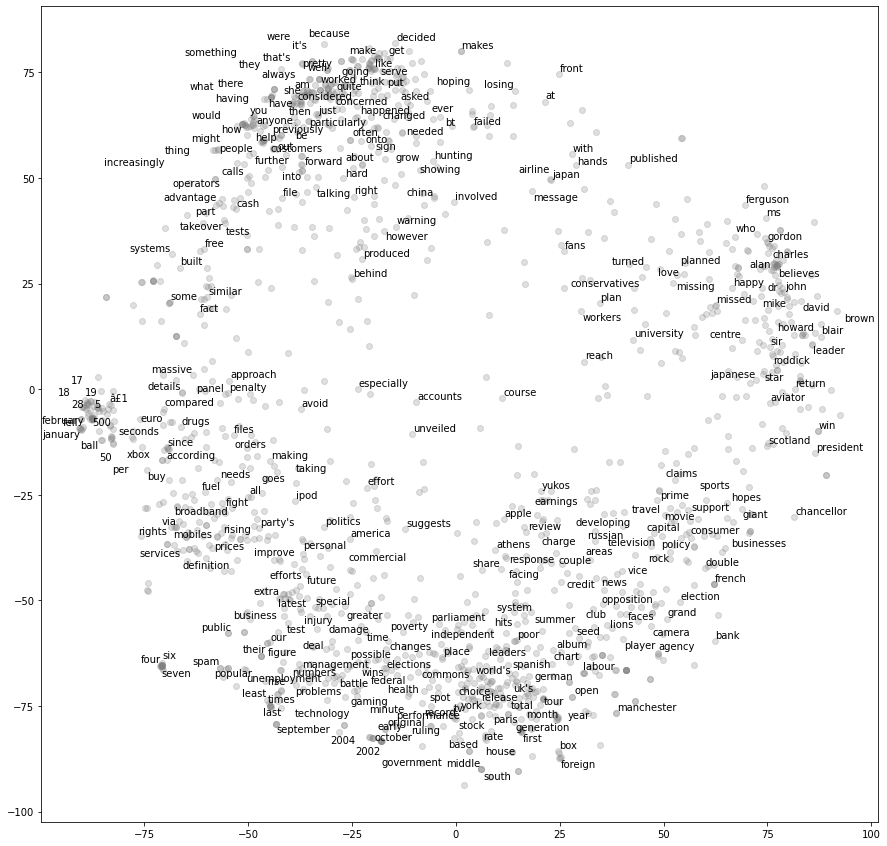

In [110]:
cbow_context_embeddings = pd.read_pickle(
    os.path.join('cbow_embeddings', 'context_embedding.pkl')
)

cbow_words, cbow_embeddings = np.array(cbow_context_embeddings.index), cbow_context_embeddings.values

tsne = TSNE(perplexity=30, n_components=2, n_iter=5000, metric='cosine')

print('Fitting embeddings to T-SNE. This can take some time ...')
# get the T-SNE manifold

cbow_embeddings_norm = cbow_embeddings / np.sum(cbow_embeddings**2, keepdims=True, axis=1)
cbow_tsne_embeddings = tsne.fit_transform(cbow_embeddings_norm)

plot(cbow_tsne_embeddings[1:1501], cbow_words[1:1501])


#Filtering all the corrupted rows
Here we will use the dataset.filter() function to filter out any corrupted inputs. Corrupted inputs in this case are dected by checking if the minimum value of each row is less than zero.

In [35]:
# Filtering data with a negative value in one of the X columns
dataset = dataset.filter(lambda x,y: tf.reduce_min(x)>0)

# Iterating the dataset
no_corrupt = True
for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()
    if np.any(x<0.0):
        print("Aha! Detected a corrupted item: ", next_element[0].numpy())
        no_corrupt = False

if no_corrupt:
    print("No corrupted items detected")

No corrupted items detected


#Iterating the dataset in batches
One of the most common behaviors when training a model is to iterate through the dataset in batches, while training or predicting using a model. The dataset.batch() function provides a convenient way to do so. Here you can see that we are using a batch_size of 5 and getting 5 rows of data at a time during iterations.

In [36]:
# Creating batches of 5
batch_size = 5
dataset = dataset.batch(batch_size=batch_size)

for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()    
    print(f"x.shape = {x.shape}, y.shape = {y.shape}")

x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (1, 4), y.shape = (1,)


#Converting class labels to class IDs
You have seen that, y here in fact is a string. However we need to convert this to a class ID (or an Integer) in order to use y to train a model. For that you can create a lookup table using the tf.lookup.StaticVocabularyTable object.

In [37]:
# The filename queue
filenames = [f"./iris.data.{i}" for i in range(1,4)]

# Defining a dataset object that accepts CSV type data
dataset = tf.data.experimental.CsvDataset(
    filenames, [tf.float32, tf.float32, tf.float32, tf.float32, tf.string])

# X will be the first 4 columns in the CSV file
x_dataset = dataset.map(lambda x1,x2,x3,x4,y: (x1,x2,x3,x4))

# Converting the string label to an integer
table = tf.lookup.StaticVocabularyTable(
    tf.lookup.KeyValueTensorInitializer(
        [b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'],
        tf.constant([0,1,2], dtype=tf.int64)),
    num_oov_buckets=1
)

# Creating the Y dataset as class labels
y_dataset = dataset.map(lambda x1,x2,x3,x4,y: table.lookup(y))

# Combining the X and Y datasets
dataset = dataset.zip((x_dataset,y_dataset))
# Columns of x are shown as a list of tensors, 
# instead we would like to have a single tensor with all columns
dataset = dataset.map(lambda x,y: (tf.stack(x),y))

for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()
    if np.min(x)<0.0:
        print(f"(corrupted) X => {x}\tY => {y}")

(corrupted) X => [ 5.8 -4.   1.2  0.2]	Y => 0
(corrupted) X => [ 4.6  3.6 -1.   0.2]	Y => 0
(corrupted) X => [ 4.7 -3.2  1.6  0.2]	Y => 0
(corrupted) X => [-5.   3.5  1.3  0.3]	Y => 0
(corrupted) X => [-5.1  3.8  1.6  0.2]	Y => 0
(corrupted) X => [ 6.9 -3.1  4.9  1.5]	Y => 1
(corrupted) X => [-5.2  2.7  3.9  1.4]	Y => 1
(corrupted) X => [ 5.8  2.7  4.1 -1. ]	Y => 1
(corrupted) X => [ 6.1 -2.8  4.7  1.2]	Y => 1
(corrupted) X => [ 5.4  3.  -4.5  1.5]	Y => 1
(corrupted) X => [ 7.1 -3.   5.9  2.1]	Y => 2
(corrupted) X => [ 5.7  2.5  5.  -2. ]	Y => 2
(corrupted) X => [-6.   2.2  5.   1.5]	Y => 2
(corrupted) X => [ 7.2 -3.2  6.   1.8]	Y => 2
(corrupted) X => [ 6.1  2.6  5.6 -1.4]	Y => 2


#Comparison operations
Comparison operations are useful for comparing two tensors. The following code example includes a few useful comparison operations.

To understand the working of these operations, let’s consider two example tensors, x and y:

In [38]:
x = tf.constant([[1,2],[3,4]], dtype=tf.int32)
y = tf.constant([[4,3],[3,2]], dtype=tf.int32)
x_equal_y = tf.equal(x, y, name=None)
x_less_y = tf.less(x, y, name=None)
# Checks if x is greater or equal than y element-wise and returns a
# boolean tensor
# x_great_equal_y => [[False,False],[True,True]]
x_great_equal_y = tf.greater_equal(x, y, name=None)
# Selects elements from x and y depending on whether, # the condition is satisfied (select elements from x) # or the condition failed (select elements from y)
condition = tf.constant([[True,False],[True,False]],dtype=tf.bool)
# x_cond_y => [[1,3],[3,2]]
x_cond_y = tf.where(condition, x, y, name=None)

In [39]:
x_sum_1 = tf.reduce_sum(x, axis=[1], keepdims=False)
x_sum_2 = tf.reduce_sum(x, axis=[0], keepdims=True)
x_sum_1

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 7], dtype=int32)>

In [40]:
v = tf.Variable(tf.constant([[1,9],[3,10],[5,11]],dtype=tf.float32),name='ref')
v[0].assign([-1, -9])
v[1,1].assign(-10)
v[1:,0].assign([-3,-5])

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[ -1.,  -9.],
       [ -3., -10.],
       [ -5.,  11.]], dtype=float32)>

In [41]:
t = tf.constant([[1,9],[3,10],[5,11]],dtype=tf.float32)
t[0].numpy()

array([1., 9.], dtype=float32)

#Loss Functions
Here we define several well-known loss functions that are commonly used in optimizing neural networks.

Mean Squared Error (MSE)
Cross Entropy Loss (CE)


In [42]:
# Returns half of L2 norm of t given by sum(t**2)/2
x = tf.constant([[2,4],[6,8]],dtype=tf.float32)
x_hat = tf.constant([[1,2],[3,4]],dtype=tf.float32)
# MSE = (1**2 + 2**2 + 3**2 + 4**2)/2 = 15
MSE = tf.nn.l2_loss(x-x_hat)

# A common loss function used in neural networks to optimize the network
# Calculating the cross_entropy with logits (unnormalized outputs of the last layer)
# instead of probabilsitic outputs leads to better numerical stabilities

y = tf.constant([[1,0],[0,1]],dtype=tf.float32)
y_hat = tf.constant([[3,1],[2,5]],dtype=tf.float32)
# This function alone doesnt average the cross entropy losses of all data points,
# You need to do that manually using reduce_mean function
CE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=y))

print('MSE Loss: ',MSE.numpy())
print('CE Loss: ',CE.numpy())

MSE Loss:  15.0
CE Loss:  0.08775769


#Stochastic Optimization
Here we discuss how to implement optimization with TensorFlow. The objective of this example is to find the mininum point of a given function. For this example, we will use a simple quadratic function where 
. We will start at an arbitrary point (say ) and keep minimizing  until we reach the minimum .

Step:  0 , x:  1.600000023841858 , y:  4.0
Step:  1 , x:  1.2799999713897705 , y:  2.56000018119812
Step:  2 , x:  1.0239999294281006 , y:  1.6383999586105347
Step:  3 , x:  0.8191999197006226 , y:  1.0485758781433105
Step:  4 , x:  0.6553599238395691 , y:  0.6710885167121887


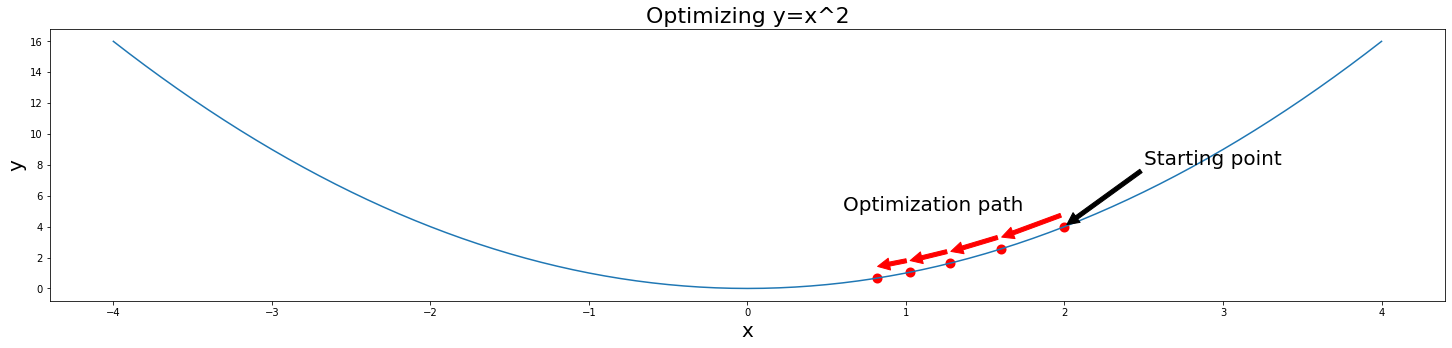

In [43]:
# Optimizers play the role of tuning neural network parameters so that their task error is minimal
# For example task error can be the cross_entropy error for a classification task
tf_x = tf.Variable(tf.constant(2.0,dtype=tf.float32),name='x') 
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# Optimizing tf_x using gradient tape
x_series, y_series = [],[]
for step in range(5):    
    x_series.append(tf_x.numpy().item())
    with tf.GradientTape() as tape:
        tf_y = tf_x**2
        
    gradients = tape.gradient(tf_y, tf_x)
    optimizer.apply_gradients(zip([gradients], [tf_x]))
    print('Step: ',step, ', x: ',tf_x.numpy().item(), ', y: ',tf_y.numpy().item())
    
    y_series.append(tf_y.numpy().item())

# Plotting the graph
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=25,h=5)
ax.plot(np.arange(-4,4.1,0.1),np.arange(-4,4.1,0.1)**2)
ax.scatter(x_series,y_series,c='red',linewidths=4)

x_offset, y_offset = 0.02, 0.75
ax.annotate('Starting point', xy=(2.01, 4.1), xytext=(2.5, 8),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=20
            )

ax.annotate('Optimization path', xy=(2.01, 4.1), xytext=(0.6, 5),
            arrowprops=None,fontsize=20
            )

for index,(x,y) in enumerate(zip(x_series,y_series)):
    if index == len(x_series)-1:
        break
    ax.annotate('', xy=(x_series[index+1], y_series[index+1]+y_offset), xytext=( x - x_offset, y + y_offset),
                arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.01),fontsize=20
                )

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Optimizing y=x^2',fontsize=22)
fig.savefig('optimization.png')

#Keras APIs
Sequential API

In [44]:
K.clear_session()

model = tf.keras.Sequential([
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [45]:
K.clear_session()

inp = tf.keras.layers.Input(shape=(784,))
out_1 = tf.keras.layers.Dense(500, activation='relu')(inp)
out_2 = tf.keras.layers.Dense(250, activation='relu')(out_1)
out = tf.keras.layers.Dense(10, activation='softmax')(out_2)

model = tf.keras.models.Model(inputs=inp, outputs=out)

#MNIST Classification
Download and Prepare Data
The code below downloads the MNIST data set from source, reshapes the images to [number_of_training_samples, single_image_size] matrix and standardize (make zero-mean unit-variance) images. Then we do the same for testing images as well.

In [46]:
import os
os.makedirs('data', exist_ok=True)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path=os.path.join(os.getcwd(), 'data', 'mnist.npz'))

print(f"(Before) x_train has shape: {x_train.shape}")
print(f"(Before) x_test has shape: {x_test.shape}")

print(f"(Before) x_train has - min: {np.min(x_train)}, max: {np.max(x_train)}")
print(f"(Before) x_test has - min: {np.min(x_test)}, max: {np.max(x_test)}")

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f"(After) x_train has shape: {x_train.shape}")
print(f"(After) x_test has shape: {x_test.shape}")

x_train = (x_train - np.mean(x_train, axis=1, keepdims=True))/np.std(x_train, axis=1, keepdims=True)
x_test = (x_test - np.mean(x_test, axis=1, keepdims=True))/np.std(x_test, axis=1, keepdims=True)

print(f"(After) x_train has - min: {np.min(x_train)}, max: {np.max(x_train)}")
print(f"(After) x_test has - min: {np.min(x_test)}, max: {np.max(x_test)}")

11490434/11490434 [==============================] - 1s 0us/step
(Before) x_train has shape: (60000, 28, 28)
(Before) x_test has shape: (10000, 28, 28)
(Before) x_train has - min: 0, max: 255
(Before) x_test has - min: 0, max: 255
(After) x_train has shape: (60000, 784)
(After) x_test has shape: (10000, 784)
(After) x_train has - min: -0.8508020140306101, max: 7.770145734421186
(After) x_test has - min: -0.731905259880747, max: 7.57798901103678


In [47]:
batch_size = 100
img_width, img_height = 28,28
input_size = img_height * img_width
num_labels = 10

def mnist_model():
    """ Defining the model using Keras sequential API """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Defining the model, optimizer and a loss function
model = mnist_model()
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['acc'])

NUM_EPOCHS = 10

""" Model training """    

# Creating onehot encoded labels
y_onehot_train = np.zeros((y_train.shape[0], num_labels), dtype=np.float32)
y_onehot_train[np.arange(y_train.shape[0]), y_train] = 1.0

# Training Phase 
train_history = model.fit(x_train,y_onehot_train, batch_size=batch_size, epochs=NUM_EPOCHS, validation_split=0.2)

""" Testing phase """

# Test inputs and targets
y_onehot_test = np.zeros((y_test.shape[0], num_labels), dtype=np.float32)
y_onehot_test[np.arange(y_test.shape[0]), y_test] = 1.0

# Evaulte on test data
test_res = model.evaluate(x_test, y_onehot_test, batch_size=batch_size)

print("Testing Results: ")
print(f"\tLoss: {test_res[0]}")
print(f"\tAccuracy: {test_res[1]}")

Epoch 1/10
480/480 [==============================] - 13s 26ms/step - loss: 0.2372 - acc: 0.9271 - val_loss: 0.1067 - val_acc: 0.9688
Epoch 2/10
480/480 [==============================] - 12s 25ms/step - loss: 0.0961 - acc: 0.9716 - val_loss: 0.1070 - val_acc: 0.9702
Epoch 3/10
480/480 [==============================] - 12s 25ms/step - loss: 0.0645 - acc: 0.9803 - val_loss: 0.1178 - val_acc: 0.9671
Epoch 4/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0483 - acc: 0.9850 - val_loss: 0.1043 - val_acc: 0.9724
Epoch 5/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0407 - acc: 0.9880 - val_loss: 0.1166 - val_acc: 0.9739
Epoch 6/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0350 - acc: 0.9899 - val_loss: 0.1170 - val_acc: 0.9765
Epoch 7/10
480/480 [==============================] - 6s 13ms/step - loss: 0.0290 - acc: 0.9919 - val_loss: 0.1211 - val_acc: 0.9768
Epoch 8/10
480/480 [==============================] - 6s 13ms/step

#Visualizing the Loss and the Accuracy

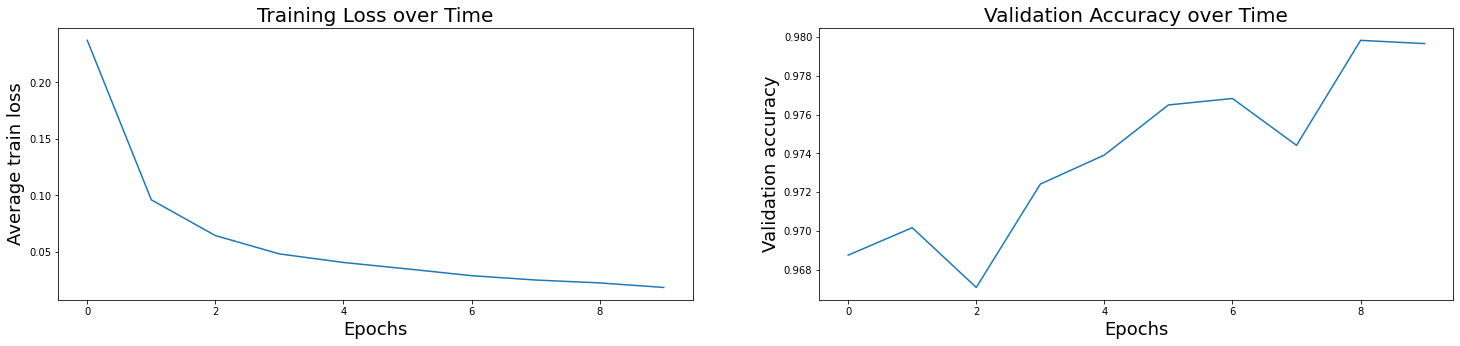

In [48]:
x_axis = np.arange(NUM_EPOCHS)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=25,h=5)
ax[0].plot(x_axis, train_history.history["loss"])
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)
ax[1].plot(x_axis, train_history.history["val_acc"])
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Validation accuracy',fontsize=18)
ax[1].set_title('Validation Accuracy over Time',fontsize=20)
fig.savefig('mnist_stats.png')

#Appendix: Defining the Neural Network from raw TensorFlow Ops
Defining Hyperparameters

In [49]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)


In [50]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])
# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


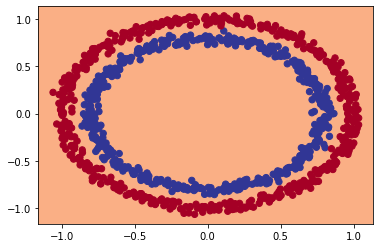

In [52]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [53]:
# Set random seed
tf.random.set_seed(42)
 
# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)
 
# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
 
# Fit our model to the data
 
## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+
 
# After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: -4016.9216 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7145.1201 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7154.2485 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [54]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


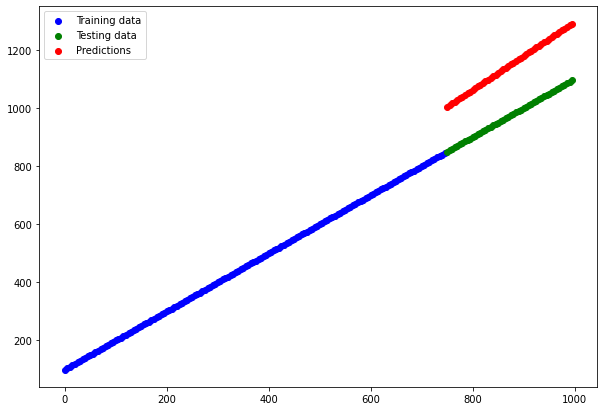

In [55]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

#The missing piece: Non-linearity
Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and clue circles), we're going to need some non-linear lines.

🔨 Practice: Before we get to the next steps, I'd encourage you to play around with the TensorFlow Playground (check out what the data has in common with our own classification data) for 10-minutes. In particular the tab which says "activation". Once you're done, come back.

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: TensorFlow Playground.

In [56]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])
# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4959 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3801 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9026 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8393 - accuracy: 0.5000
Epoch 11/

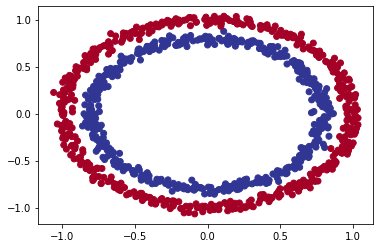

In [57]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


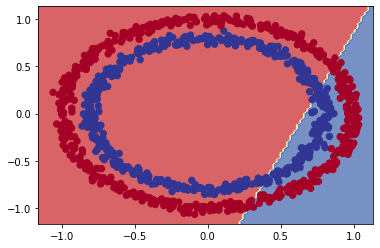

In [58]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)


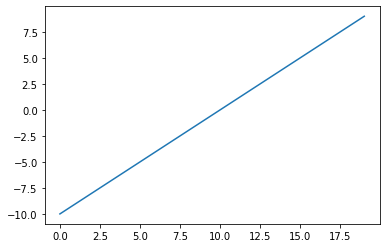

In [59]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A
# Visualize our toy tensor
plt.plot(A);



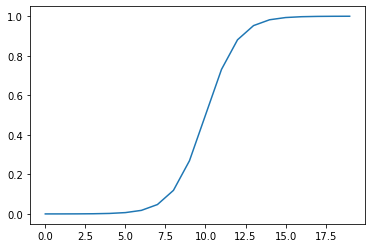

In [60]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

plt.plot(sigmoid(A))


In [61]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 


((800, 2), (200, 2))

In [62]:
# Set random seed
tf.random.set_seed(42)

#Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")

])    
# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [63]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set: 0.12468848377466202
Model accuracy on the test set: 100.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


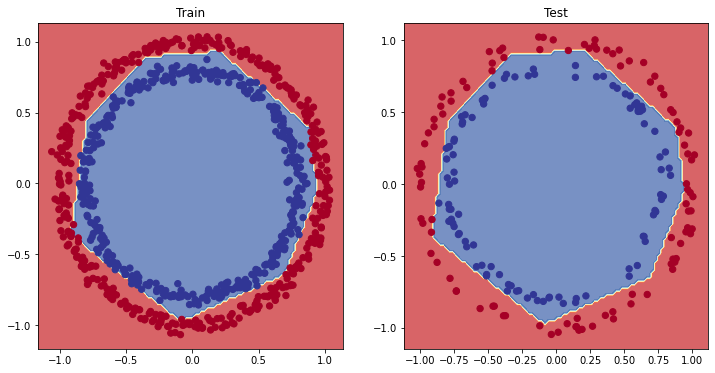

In [64]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()


In [65]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 training curves')

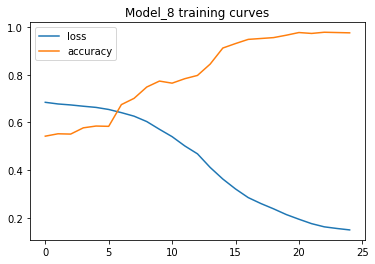

In [66]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

#Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

A learning rate callback.
You can think of a callback as an extra piece of functionality you can add to your model while its training.
Another model (we could use the same ones as above, we we're practicing building models here).
A modified loss curves plot.
We'll go through each with code, then explain what's going on.

🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.



In [67]:
#set the random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation='relu'),
          tf.keras.layers.Dense(4, activation="relu"),
          tf.keras.layers.Dense(1, activation="sigmoid")
])     

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 
# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

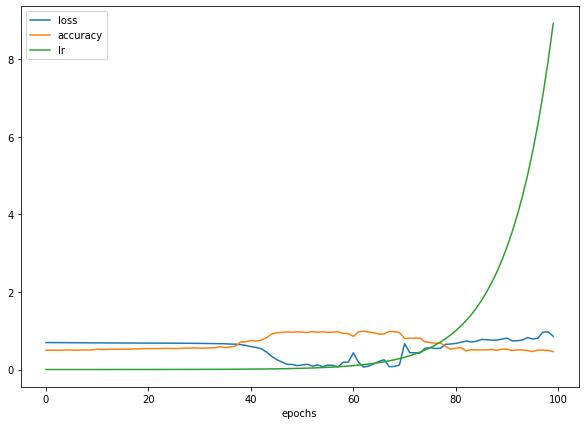

In [68]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

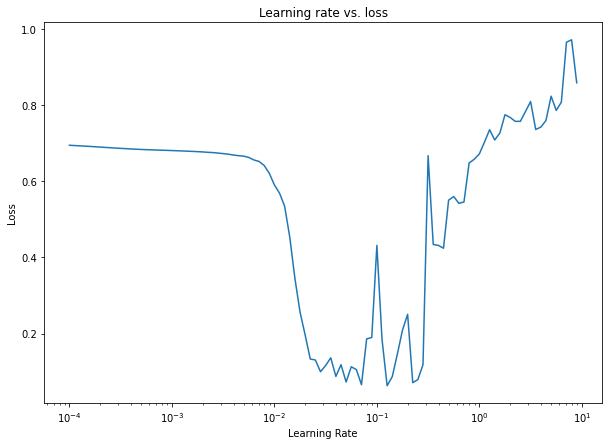

In [69]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [70]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [71]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.0574018768966198
Model accuracy on test set: 99.00%


In [72]:
# Create a confusion matrix
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 0, 99]])

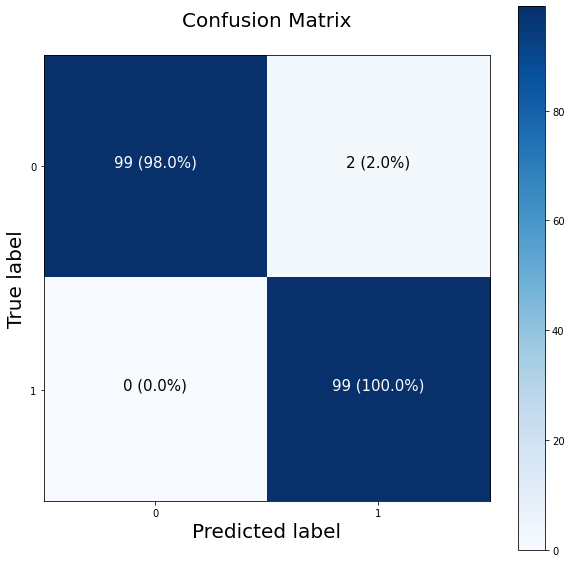

In [73]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Working with a larger example (multiclass classification)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 Resource: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [74]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [75]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [76]:
#check the shape
train_data.shape

(60000, 28, 28)

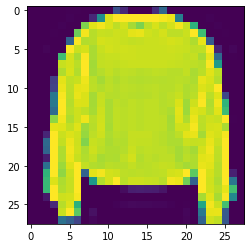

In [77]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

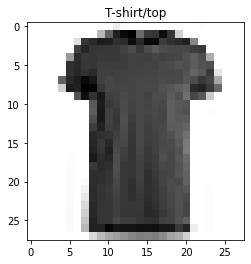

In [79]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

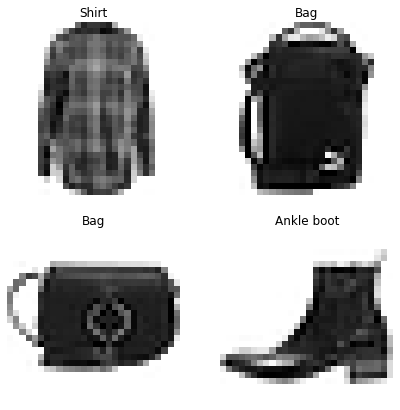

In [80]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.
You ready? Let's go.

In [81]:
# Set random seed
tf.random.set_seed(42)

#Create the model
model_11 = tf.keras.Sequential([
       tf.keras.layers.Flatten(input_shape=(28, 28)), 
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(4, activation="relu"),
       tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
    ])
# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [82]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Check the min and max values of the training data
train_data.min(), train_data.max()


(0, 255)

In [84]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

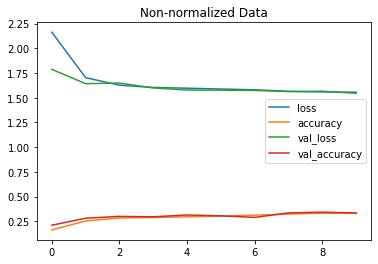

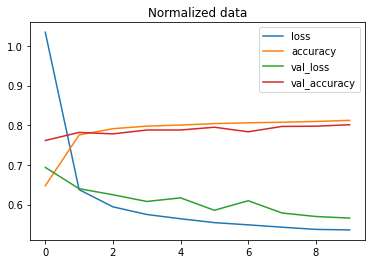

In [86]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [87]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

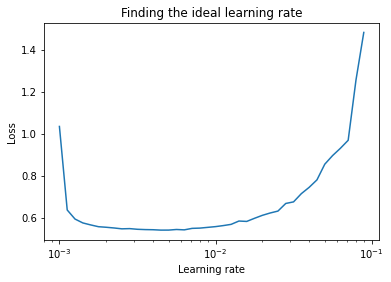

In [88]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [89]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Ep

In [90]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [91]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, 3.3405751e-03,
        1.3249395e-05, 1.4383214e-21, 8.2790129e-06, 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       [7.5031356e-05, 9.9053681e-01, 4.2528447e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276367e-18, 2.6808189e-05, 4.8124370e-14,
        1.4521520e-06, 2.2211375e-11],
       [7.2189979e-02, 1.5495764e-06, 2.5566906e-01, 1.0363132e-02,
        4.3541368e-02, 1.1069343e-13, 6.1693007e-01, 6.7543116e-23,
        1.3049184e-03, 1.2140288e-09]], dtype=float32)

In [92]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [93]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [94]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

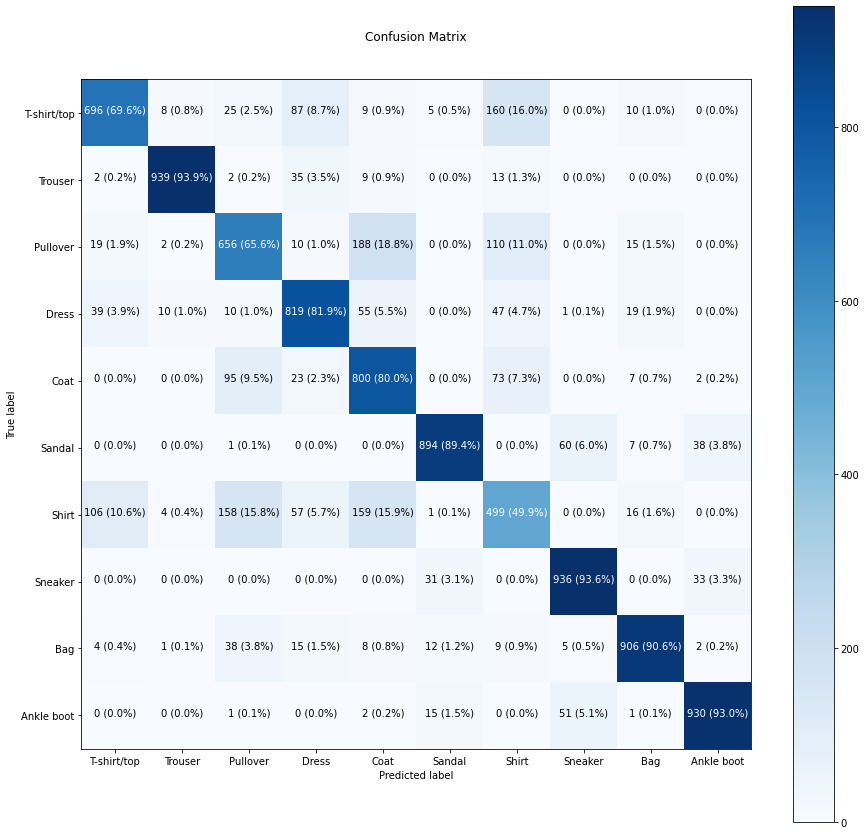

In [95]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


In [96]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 18ms/step


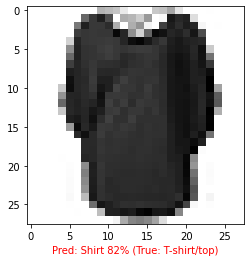

In [97]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)